<a href="https://colab.research.google.com/github/DrewFinley/IMSE-541-HW/blob/main/PaperHelicopterLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('drive/My Drive/SQC/Helicopter Data - Sheet1.csv', sep=',', na_values=".")

data

,A,B,C,Times,Run Order
0,-1,-1,-1,2.16,1
1,1,-1,-1,2.25,4
2,-1,1,-1,1.96,7
3,1,1,-1,2.37,10
4,-1,-1,1,2.03,13
5,1,-1,1,2.52,16
6,-1,1,1,1.90,19
7,1,1,1,1.83,22
8,-1,-1,-1,2.25,2
9,1,-1,-1,2.22,5


In [5]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          24 non-null     int64  
 1   B          24 non-null     int64  
 2   C          24 non-null     int64  
 3   Times      24 non-null     float64
 4   Run Order  24 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


In [6]:
X=df[['A', 'B', 'C']]
X

,A,B,C
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1
8,-1,-1,-1
9,1,-1,-1


In [7]:
xx=X.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'A', 'B', 'C','AB', 'AC', 'BC', 'ABC']) #if interaction_only=False, then 1, x1, x2, x1^2, x1x2, x2^2
xxpd

,I,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [8]:
X=xxpd[['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']]
X

,A,B,C,AB,AC,BC,ABC
0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [9]:
Y=df[['Times']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[2.19666667],
       [2.24      ],
       [1.98333333],
       [2.34      ],
       [2.06666667],
       [2.35333333],
       [1.81      ],
       [1.93666667],
       [2.19666667],
       [2.24      ],
       [1.98333333],
       [2.34      ],
       [2.06666667],
       [2.35333333],
       [1.81      ],
       [1.93666667],
       [2.19666667],
       [2.24      ],
       [1.98333333],
       [2.34      ],
       [2.06666667],
       [2.35333333],
       [1.81      ],
       [1.93666667]])

In [10]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,A,B,C,AB,AC,BC,ABC
0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
9,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [11]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     17.45
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.19e-06
Time:                        13:12:56   Log-Likelihood:                 30.819
No. Observations:                  24   AIC:                            -45.64
Df Residuals:                      16   BIC:                            -36.21
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1158      0.017    126.320      0.0

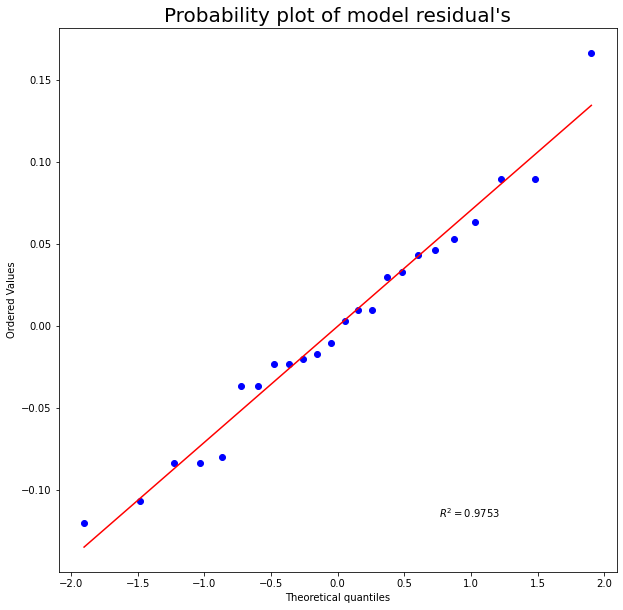

In [12]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [13]:
stats.levene(df['Times'][df['A'] == -1],
             df['Times'][df['A'] == 1])

LeveneResult(statistic=0.11591759312924749, pvalue=0.7367347113790184)

In [14]:
stats.levene(df['Times'][df['B'] == -1],
             df['Times'][df['B'] == 1])

LeveneResult(statistic=1.6595162887181183, pvalue=0.2110533530870778)

In [15]:
stats.levene(df['Times'][df['C'] == -1],
             df['Times'][df['C'] == 1])

LeveneResult(statistic=1.5330566547630493, pvalue=0.2287047939657896)

In [16]:
data2 = pd.read_csv('/content/Helicopter Data - Sheet 2 (1).csv')
data2

,WingLength,BodyLength,Paperclips,Times,RunOrder
0,-1,-1,-1,2.16,1
1,1,-1,-1,2.25,4
2,-1,1,-1,1.96,7
3,1,1,-1,2.37,10
4,-1,-1,1,2.03,13
5,1,-1,1,2.52,16
6,-1,1,1,1.90,19
7,1,1,1,1.83,22
8,-1,-1,-1,2.25,2
9,1,-1,-1,2.22,5


In [17]:
WingLength = data2['WingLength']
BodyLength = data2['BodyLength']
Paperclips = data2['Paperclips']
Times = data2['Times']
df2=data2 #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          24 non-null     int64  
 1   B          24 non-null     int64  
 2   C          24 non-null     int64  
 3   Times      24 non-null     float64
 4   Run Order  24 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


In [18]:
model = ols('Times ~ C(WingLength) + C(BodyLength) + C(Paperclips) + C(WingLength):C(BodyLength) + C(WingLength):C(Paperclips) + C(BodyLength):C(Paperclips) + C(WingLength):C(BodyLength):C(Paperclips)', data=df2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(WingLength),0.248067,1.0,36.841584,0.000016
C(BodyLength),0.232067,1.0,34.465347,0.000024
C(Paperclips),0.132017,1.0,19.606436,0.000422
C(WingLength):C(BodyLength),0.008817,1.0,1.309406,0.269333
C(WingLength):C(Paperclips),0.000067,1.0,0.009901,0.921974
C(BodyLength):C(Paperclips),0.117600,1.0,17.465347,0.000709
C(WingLength):C(BodyLength):C(Paperclips),0.084017,1.0,12.477723,0.002768
Residual,0.107733,16.0,NaN,NaN


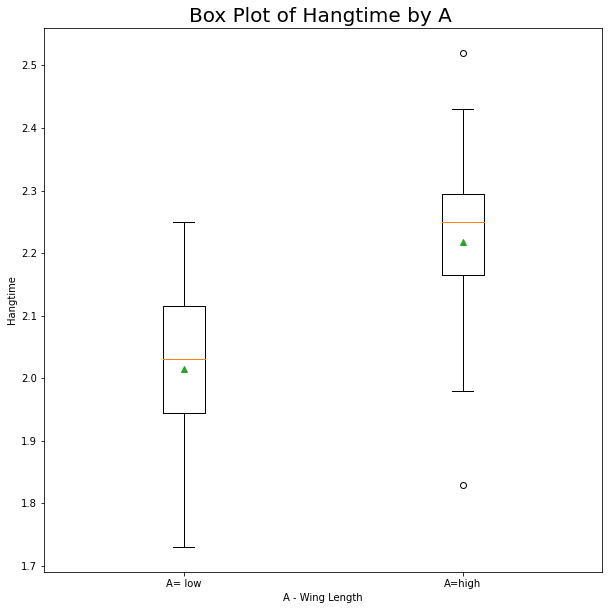

In [19]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Hangtime by A ", fontsize= 20)
ax.set

data2 = [df['Times'][df['A'] == -1],
             df['Times'][df['A'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Wing Length")
plt.ylabel("Hangtime")

plt.show()

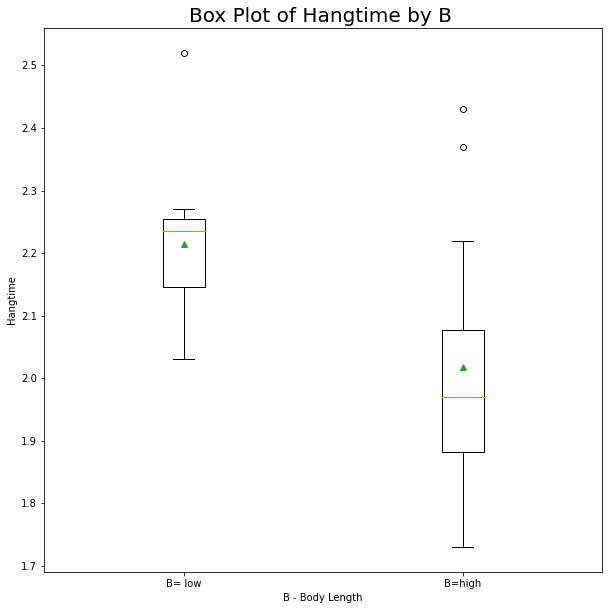

In [20]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Hangtime by B ", fontsize= 20)
ax.set

data2 = [df['Times'][df['B'] == -1],
             df['Times'][df['B'] == 1]]


ax.boxplot(data2,
           labels= ['B= low', 'B=high'],
           showmeans= True)

plt.xlabel("B - Body Length")
plt.ylabel("Hangtime")

plt.show()

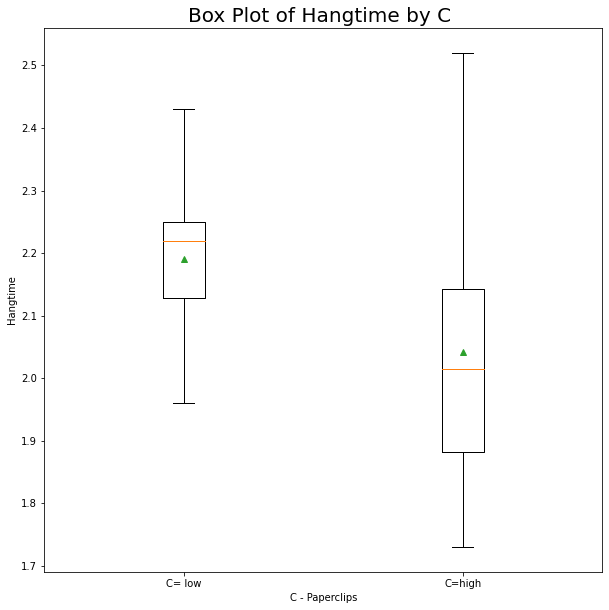

In [21]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Hangtime by C ", fontsize= 20)
ax.set

data2 = [df['Times'][df['C'] == -1],
             df['Times'][df['C'] == 1]]


ax.boxplot(data2,
           labels= ['C= low', 'C=high'],
           showmeans= True)

plt.xlabel("C - Paperclips")
plt.ylabel("Hangtime")

plt.show()

In [22]:
N = len(Y)
#c = list(range(0, N))
#xorder = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used

order=data[['Run Order']]
order=order.to_numpy() 
#the following step reduces the index in run_order by 1 so that the python index from 0 can function properly
order2=np.zeros(N) #order 2 is a list of zero
for i in range(N):
    order2[i]=order[i]-1 #assign the value of element in an array into the list


print('order of observations/residuals is')
print(order2)
# convert the array into a list for indexing
#order=order.reshape((1,N))
#order=order.tolist()
#print(order)

order of observations/residuals is
[ 0.  3.  6.  9. 12. 15. 18. 21.  1.  4.  7. 10. 13. 16. 19. 22.  2.  5.
  8. 11. 14. 17. 20. 23.]


In [23]:
res.resid

0    -0.036667
1     0.010000
2    -0.023333
3     0.030000
4    -0.036667
5     0.166667
6     0.090000
7    -0.106667
8     0.053333
9    -0.020000
10   -0.023333
11   -0.120000
12    0.003333
13   -0.083333
14   -0.080000
15    0.043333
16   -0.016667
17    0.010000
18    0.046667
19    0.090000
20    0.033333
21   -0.083333
22   -0.010000
23    0.063333
dtype: float64

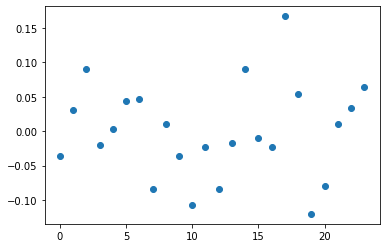

In [24]:
eij=res.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order2] # assign run order (see the previous code box)

plt.scatter(x, y)

In [25]:
X=xxpd[['A', 'B', 'C']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Times   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     12.82
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           6.73e-05
Time:                        13:12:58   Log-Likelihood:                 17.822
No. Observations:                  24   AIC:                            -27.64
Df Residuals:                      20   BIC:                            -22.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1158      0.026     82.173      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
Y=df[['Times']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[2.18666667],
       [2.39      ],
       [1.99      ],
       [2.19333333],
       [2.03833333],
       [2.24166667],
       [1.84166667],
       [2.045     ],
       [2.18666667],
       [2.39      ],
       [1.99      ],
       [2.19333333],
       [2.03833333],
       [2.24166667],
       [1.84166667],
       [2.045     ],
       [2.18666667],
       [2.39      ],
       [1.99      ],
       [2.19333333],
       [2.03833333],
       [2.24166667],
       [1.84166667],
       [2.045     ]])

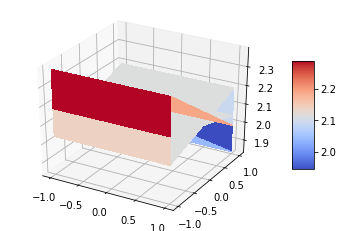

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

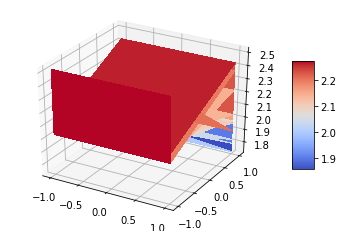

In [28]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

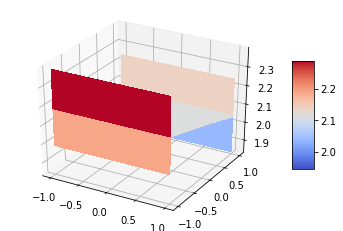

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

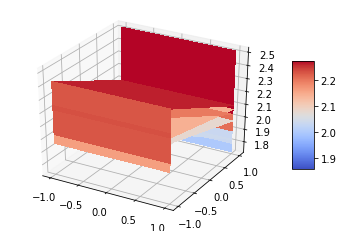

In [30]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

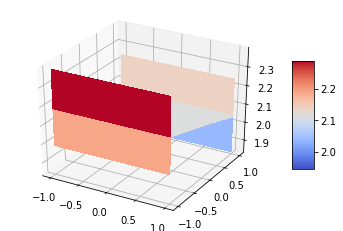

In [31]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['B']
x2=df['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

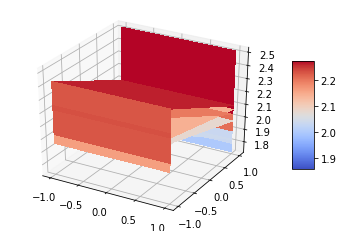

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['B']
x2=df['C']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()